# Police killings in the USA

To get a better look at this notebook, we recommend you to open it in Deepnote instead of Jupyter notebook.

- Vladyslav Horbatenko

- Alexander Kuba

- Lucie Navratilova

- Rolands Lipenitis

- Matej Kostun

# 1 Introduction


We decided to analyze data on police killings in the US in 2015. The dataset was compiled by the Guardian. 




## 1.1 Objectives of the study

### 1.1.1 Police brutality and systematic racism in the US

I imagine that researchers' interest in conducting this study was sparked by the numerous incidents of police brutality in the United States over the past decade, such as the tragic deaths of George Floyd or Breonna Taylor. This study could focus on examining police brutality and systematic racism in the US. Researchers could analyze the differences between people killed by police, especially their ethnicity, as the number of cases of police brutality against people of color increases.

## 1.2 Description of the data

### 1.2.1 Observational study or an experiment?

This study is observational, the reason being that we did not randomly impose a treatment condition on at least some participants, but simply observed the data collected and drew conclusions.

### 1.2.2 Variables

The following have been recorded for each victim and the police killing incident: name, age, gender, race/ethnicity, month, day, year, city, state, latitude & longitude, cause of death and whether they were armed (and if so, with what weapon) or not.

- name - categorical

- gender - binary

- race/ethnicity - categorical

- time of crime (dd/mm/yyyy) - ordinal (although time is seen as a continuous variable, we decided to consider it as an ordinal variable since we were looking at the period of different months rather than specific points in time). 

- city - categorical

- state - categorical

- latitude - continuous

- longitude - continuous

- cause of death - categorical

- armedness - categorical (but we also analysed it as binary (armed/unarmed) in section 2.3)

### 1.2.3 Observational unit & sample size

Observational unit: people killed by police in USA
Sample size: 467

### 1.2.4 Populations

The different populations we will be working with are:

- White people and people of color (POC; non-white)

- White people, Black people, Hispanic/Latino people, Asian/Islander Pacific people and Native Americans

- Armed and unarmed people

- People from red states and people from blue states

## 1.3 Hypothesis

### Is racial bias a factor in the use of deadly force by police officers in the US?

→ How many of those killed by police were carrying a weapon? And do race/ethnicity and being armed have an impact on the likelihood of being killed by a police officer?
→ What was the most common cause of death and is there a predominant cause of death for each of the different ethnicities? Is there a correlation ?
→ In which age group were the most people killed by the police? And is there a connection between race and age?
→ When did the most killings happen? Were there more critical months? And can we prove that this data follows a binomial distribution?
→ Were there perhaps more murders in certain regions? Can we plot the coordinates on a map?
→ Were there differences between killings in red and blue states?

# 2 Data Analysis

## 2.1 Data frame 

In [1]:
!pip install folium

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import folium
from folium import plugins
import geopandas as gpd
import scipy.stats as st
from scipy import stats
from math import sqrt

For a better overview of what data was recorded, we will display the header of our data frame:

In [3]:
df = pd.read_csv('http://dirac.ruc.dk/~urp/2022/BC1/data/503_police/police.csv')
df.head()

,name,age,gender,raceethnicity,month,day,year,city,state,latitude,longitude,cause,armed
0,A'donte Washington,16.0,Male,Black,2,23,2015,Millbrook,AL,32.529577,-86.362829,Gunshot,No
1,Aaron Rutledge,27.0,Male,White,4,2,2015,Pineville,LA,31.321739,-92.434860,Gunshot,No
2,Aaron Siler,26.0,Male,White,3,14,2015,Kenosha,WI,42.583560,-87.835710,Gunshot,No
3,Aaron Valdez,25.0,Male,Hispanic/Latino,3,11,2015,South Gate,CA,33.939298,-118.219463,Gunshot,Firearm
4,Adam Jovicic,29.0,Male,White,3,19,2015,Munroe Falls,OH,41.148575,-81.429878,Gunshot,No


##  2.2 Variation by race/ethnicity

The pie chart below shows that more than 50% of all samples were from white individuals. The remainder were minorities - including Black (29.87%), Hispanic/Latino (14.82%), Asian/Pacific Islander (2.21%), and Native American (4).

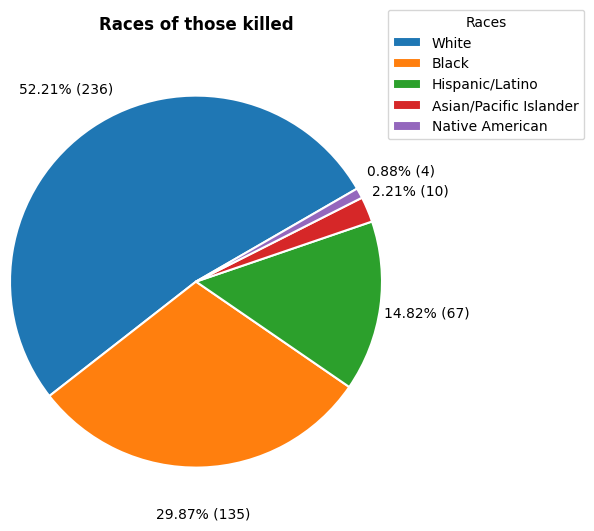

In [4]:
# Lucie
# creates a new data frame with the value counts of ethnicities so I can add those after the % in my pie chart
races_count_df = pd.DataFrame(df['raceethnicity'].value_counts().reset_index().values, columns=["Race", "Number"])
races_count_df = races_count_df.sort_index(axis = 0, ascending=True)

# creates a pie chart of races of those killed
df['raceethnicity'].value_counts(normalize=True *100).plot.pie(
    figsize=(3,4),
    autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*races_count_df['Number'].sum()),
    pctdistance = 1.25,
    labeldistance = None,
    ylabel = '',
    startangle=30,
    radius = 2,
    wedgeprops={"edgecolor":"white",'linewidth': 1.5, 'antialiased': True}
);
plt.legend(loc="best", bbox_to_anchor=(2.2, 1.7), title="Races");
plt.title("Races of those killed", y = 1.55, fontweight="bold");
plt.show();

We want to mention already that the data set we are working with is probably not the best sample as it does not reflect the ethnic distribution in the U.S., where white people make up 60% of the population, Hispanics/Latinos 19%, black people only 13%, Asians 5%, and the rest are other ethnicities. (source)

## 2.3 How many victims were armed?

Although the data contained many different pieces of information about the types of weapons carried by those killed, we thought it was a good idea to look at these data as a binary variable simply to see how many of the total people killed were armed. 

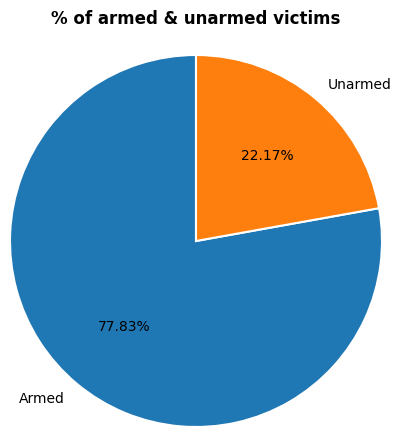

In [5]:
# Lucie
# creates a new column in the data frame called "armed yes/no" to get a simple overview of who was armed and who wasn't.
df['armed yes/no'] = df['armed'].map({
    'Firearm': 'Armed' ,
    'Knife':'Armed' ,
    'Other':'Armed' ,
    'Vehicle':'Armed' ,
    'Non-lethal firearm':'Armed' ,
    'Disputed':'Armed' ,
    'No':'Unarmed'
})

# creates a pie chart of armed & unarmed victims
df['armed yes/no'].value_counts(normalize=True *100).plot.pie(
    figsize=(3,4),
    autopct='%1.2f%%',
    ylabel = '',
    radius = 2,
    startangle = 90,
    wedgeprops={"edgecolor":"white",'linewidth': 1.5, 'antialiased': True},
);
plt.title("% of armed & unarmed victims", y = 1.4, fontweight="bold");
plt.show()

This raises an interesting question. What did the unarmed people do to deserve being killed by the police? Was it perhaps racial bias, and the unarmed part of the diagram is mainly made up of POC? I found this article that shows why this question is valid.

### 2.3.1 Is there a connection between race and armedness?

In [6]:
# Lucie
# creates a new data frame "poc_df" with only POC
poc_df = df[df['raceethnicity'] != 'White']

# what % of POC killed by the police were armed/unarmed
print('\033[1m  What % of POC killed by the police were armed/unarmed: \033[0m')
print(poc_df['armed yes/no'].value_counts(normalize=True))

# creates a new data frame "white_df" with only white people
white_df = df[df['raceethnicity'] == 'White']

# what % of white people killed by the police were armed/unarmed
print('\033[1m  What % of white people killed by the police were armed/unarmed: \033[0m')
print(white_df['armed yes/no'].value_counts(normalize=True))

  What % of POC killed by the police were armed/unarmed: 
Armed      0.777293
Unarmed    0.222707
Name: armed yes/no, dtype: float64
  What % of white people killed by the police were armed/unarmed: 
Armed      0.779221
Unarmed    0.220779
Name: armed yes/no, dtype: float64


The table above shows that the percentage of people killed while armed is very similar for both white people & POC, which suggests that there is no connection between race and armedness.
For a better illustration, take a look at the following graph:

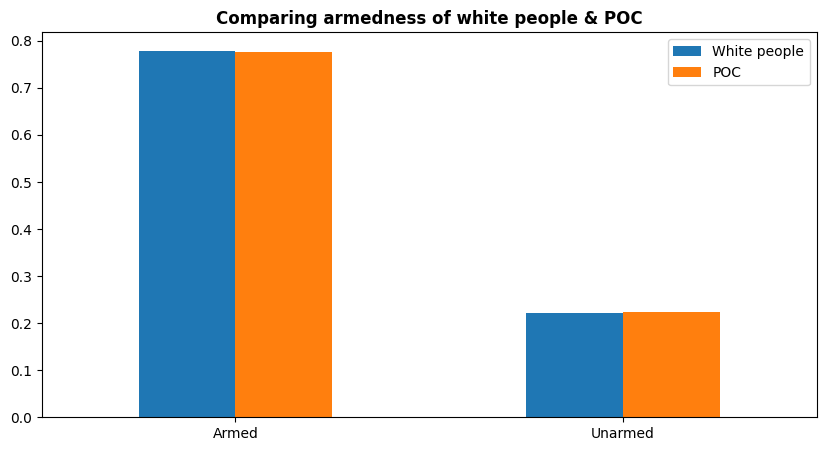

In [7]:
# Lucie
comparison_races_armed = pd.DataFrame({
    'White people': white_df['armed yes/no'].value_counts(normalize=True),
    'POC': poc_df['armed yes/no'].value_counts(normalize=True)
})
comparison_races_armed.plot.bar(
    rot = 0,
    figsize = (10, 5),
)
plt.title("Comparing armedness of white people & POC", fontweight="bold");

Then why are there so many news articles about police brutality against unarmed POC when the analysis of the data says something else? I think it's because of the data set we're working with. We don't know much about it; perhaps the person who published it manipulated it beforehand and cherry-picked data to influence the outcome of the analysis.

## 2.4 Cause of death

Since we had so much information about the different causes of death, I thought it would be interesting to plot them in a pie chart. As expected, most of the deaths were caused by a gunshot. However, there was one particular cause of death (death in custody) that I would like to explore in more detail.

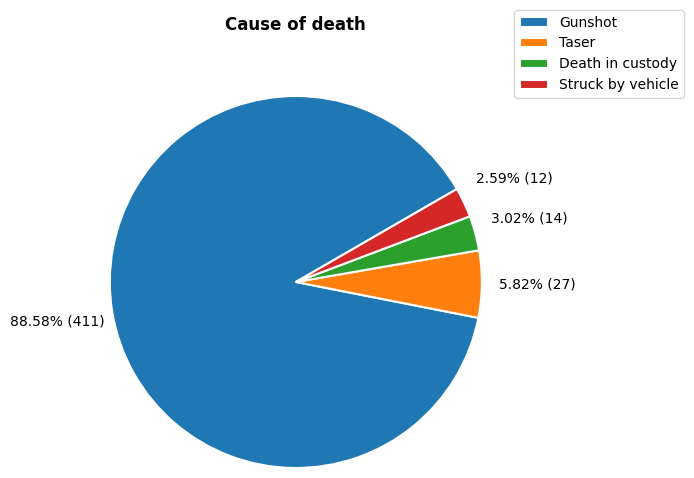

In [8]:
# Lucie
# creates a new data frame with the value counts of deaths so I can add those after the % in my pie chart
deaths_count_df = pd.DataFrame(df['cause'].value_counts().reset_index().values, columns=["Cause of death", "Number"])
deaths_count_df = deaths_count_df.sort_index(axis = 0, ascending=True)

# creates a pie chart to show the causes of death
df['cause'].value_counts(normalize=True *100).plot.pie(
    figsize=(3,4),
    autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*deaths_count_df['Number'].sum()),
    pctdistance = 1.3,
    labeldistance = None,
    ylabel = '',
    startangle=30,
    radius = 2,
    wedgeprops={"edgecolor":"white",'linewidth': 1.5, 'antialiased': True},
);
plt.legend(loc="best", bbox_to_anchor=(2.2, 1.7));
plt.title("Cause of death", y = 1.55, fontweight="bold");
plt.show()

### 2.4.1 Is there any connection between race and cause of death?

In [9]:
# Lucie
options = ['Gunshot', 'Taser', 'Death in custody', 'Struck by vehicle']

# create a new data frame of only POC with causes of death
cause_poc_df = poc_df[poc_df['cause'].isin(options)]
print('\033[1m  Causes of death for POC: \033[0m')
print(cause_poc_df['cause'].value_counts(normalize=True))

# create a new data frame of only white people with causes of deaths
cause_white_df = white_df[white_df['cause'].isin(options)] 
print('\033[1m Causes of death for white people: \033[0m')
print(cause_white_df['cause'].value_counts(normalize=True))

  Causes of death for POC: 
Gunshot              0.860262
Taser                0.078603
Death in custody     0.043668
Struck by vehicle    0.017467
Name: cause, dtype: float64
 Causes of death for white people: 
Gunshot              0.910638
Taser                0.038298
Struck by vehicle    0.034043
Death in custody     0.017021
Name: cause, dtype: float64


Although most deaths were caused by gunshots, it is interesting to see that more POC were killed in custody and by a vehicle than white people.

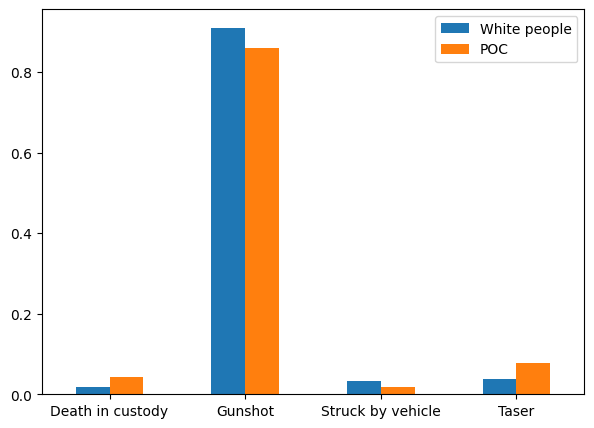

In [10]:
# Lucie
comparison_cause = pd.DataFrame({
    'White people': cause_white_df['cause'].value_counts(normalize=True),
    'POC': cause_poc_df['cause'].value_counts(normalize=True),
})
comparison_cause.plot.bar(
    figsize = (7,5),
    rot = 0
);

Out of those 14 deaths in custody, was there maybe a difference between the races of those who were killed?
Due to recent events in Iran (the death of Mahsa Amini) and many others in the past, such as the death of George Floyd, that have shown that police treat minority prisoners quite differently than whites, I would like to examine whether our data show a relationship between being a minority and dying in custody.

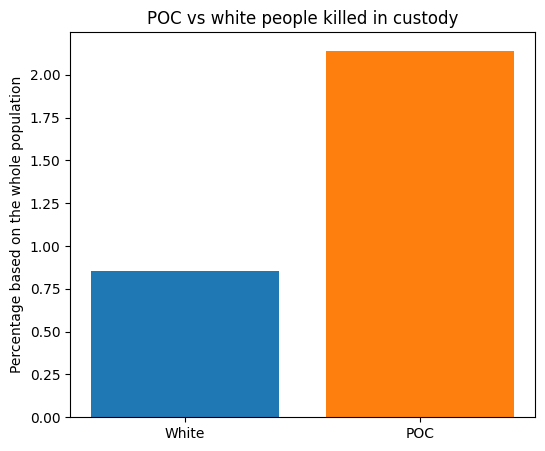

In [11]:
# Lucie
# creates a new df with only people who died in custody
only_death = df[df['cause'] == 'Death in custody'] 

# creates a new variable "whole_count" where we store the n of our sample size (467)
whole_count = len(df)

# creates 2 new variables - "white_count" & "poc_count" out of the data frame we created in the first step
# to calculate the number of POC & white people who died in custody (10 & 4)
white_count = len(only_death[only_death['raceethnicity'] == 'White'])
poc_count = len(only_death[only_death['raceethnicity'] != 'White'])

# we plot these values:
plt.figure(figsize=(6, 5))
plt.title("POC vs white people killed in custody")
plt.bar(x = 'White', height = (white_count / whole_count) * 100)
plt.bar(x = 'POC', height = (poc_count / whole_count) * 100)

plt.ylabel("Percentage based on the whole population")

plt.show();

When we compare deaths in custody between white people & POC, we can see that only 0.86 % of white people were killed in custody, 
while 2.14% of POC were killed in custody. (percentage based on the whole population) 
This could mean that police officers do indeed hold racial bias toward detainees, but I believe we have too little data to draw that conclusion with 100% certainty. 

## 2.5 Does age affect the results in any way?

### 2.5.1 Police killings by age

We were curious to see what age group was most often killed by the police. Our exceptation is late twenties or early thirties.

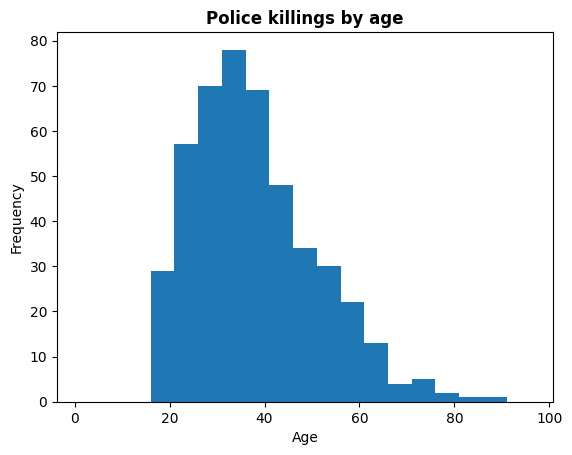

In [12]:
# Roland
df['age'].plot.hist(bins=np.arange(1, 100, 5))
plt.xlabel('Age')
plt.title('Police killings by age', fontweight="bold");

The figure above shows a unimodal distribution that is right skewed. Let us compute the mean, median and mode for the age column:

In [13]:
df['age'].mean()

37.36717062634989

In [14]:
df['age'].median()

35.0

We see that the median is smaller than the mean due to the fact that the distribution is right skewed.

In [15]:
df['age'].mode()

0    29.0
1    34.0
2    35.0
dtype: float64

Other interesting values are the minimum and maximum. What was the age of the youngest person killed by the police and how old was the oldest person?

In [16]:
print(df['age'].min())
print(df['age'].max())

16.0
87.0


The youngest people killed by the police were as young as 16, and the oldest was an 87 year old.

In [17]:
df[df['age'] == 16] 

,name,age,gender,raceethnicity,month,day,year,city,state,latitude,longitude,cause,armed,armed yes/no
0,A'donte Washington,16.0,Male,Black,2,23,2015,Millbrook,AL,32.529577,-86.362829,Gunshot,No,Unarmed
215,Jason Hendrix,16.0,Male,White,2,14,2015,Essex,MD,39.298348,-76.440161,Gunshot,Firearm,Armed
279,Kendre Alston,16.0,Male,Black,3,19,2015,Jacksonville,FL,30.377840,-81.683617,Gunshot,Firearm,Armed


The data frame above shows information on the three 16-year-old teenagers killed by police. What is interesting is that they all come from the southeastern region and that 2 out of 3 were armed. Perhaps it's easier to get a gun as a kid in that region? 
Information about all three and their cases can be found here:
A'donte Washington
Jason Hendrix
Kendre Alston

In [18]:
df[df['age'] == 87] 

,name,age,gender,raceethnicity,month,day,year,city,state,latitude,longitude,cause,armed,armed yes/no
301,Louis Becker,87.0,Male,White,1,14,2015,Catskill,NY,42.262431,-73.935739,Struck by vehicle,Firearm,Armed


The data frame above shows information on the 87-year-old man killed by police. It appears to have been an unfortunate accident in which his truck was hit by a police vehicle. (source)

### 2.5.2 Is there a connection between race and age?

We would like to investigate whether there is a link between the age of people killed and their race/ethnicity.
As we have already analyzed, the average age of people killed is 37, but does race/ethnicity make a difference?

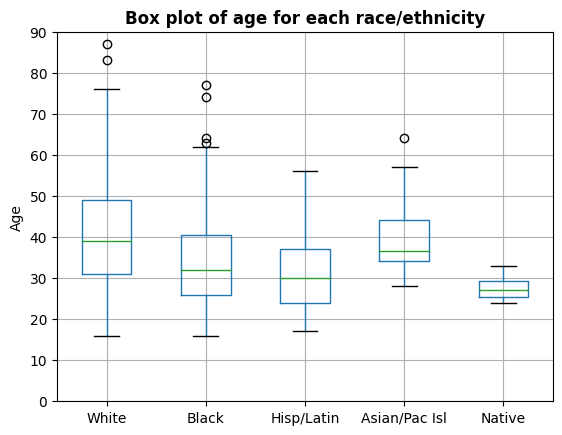

In [19]:
# Vlad
# making age series for each race/ethnicity
white_age = df[df['raceethnicity']=='White']['age'].reset_index(drop=True)
black_age = df[df['raceethnicity']=='Black']['age'].reset_index(drop=True)
hisp_latin_age = df[df['raceethnicity']=='Hispanic/Latino']['age'].reset_index(drop=True)
asian_islander_age = df[df['raceethnicity']=='Asian/Pacific Islander']['age'].reset_index(drop=True)
native_age = df[df['raceethnicity']=='Native American']['age'].reset_index(drop=True)


# making a new DataFrame
age_of_raceethnicity = pd.concat({
    'White': white_age,
    'Black': black_age,
    'Hisp/Latin': hisp_latin_age,
    'Asian/Pac Isl': asian_islander_age,
    'Native': native_age
}, axis='columns')

fig, axes = plt.subplots(1)
plt.setp(axes, ylim=(0,90))
#plotting our DataFrame with boxplot
age_of_raceethnicity.boxplot(
    figsize=(6,6),
    grid=True,
    widths=0.5,
    sym = 'o',
    vert=True
)

# adding labels
plt.ylabel('Age')
plt.title('Box plot of age for each race/ethnicity', fontweight = 'bold')
plt.show()

This boxplot shows us that white people have the largest age difference, and some of them were even killed at over 80 years of age (outliers).
Asians and Pacific Islanders tend to have similar statistics to white people.
Black and Hispanic/Latino ethnic groups are mostly killed at an earlier age, and we can see that 2.9% (4 out of 135) of black people were even "over-aged" - over 60 and close to 80 years old.
There is little data available for Native Americans, but according to this we can say that Native Americans are mostly within our expectations. 

Now let's take a look at confidence intervals to investigate the null hepothesis (no difference between the two populations - White and Black)

In [20]:
# Vlad
#computing confidence intervals (our version)


# finding the mean of black and white people's ages
white_mean = age_of_raceethnicity['White'].mean()
black_mean = age_of_raceethnicity['Black'].mean()

#finding the standard deviation for black and white people's ages
standard_white = age_of_raceethnicity['White'].std()
standard_black = age_of_raceethnicity['Black'].std()

# preparing sample size
white_size = age_of_raceethnicity['White'].count()
black_size = age_of_raceethnicity['Black'].count()

# basic calculations needed for confidence interval
confidence_interval = 0.95
P = 1 - confidence_interval
f_white = white_size - 1                # Degrees of fredom for black people
f_black = black_size - 1                # Degrees of fredom for black people
t_white = stats.t.ppf(1-P/2, f_white)   # Correction factor
t_black = stats.t.ppf(1-P/2, f_black)

# finding SEy for both
SEy_white = standard_white/len(white_age)**0.5
delta_mean_white = t_white*SEy_white

SEy_black = standard_black/len(black_age)**0.5
delta_mean_black = t_black*SEy_black

# printing results for white poeple
print(f'The lower limit of the {confidence_interval} confidence interval of white people is {white_mean-delta_mean_white}')
print(f'The upper limit of the {confidence_interval} confidence interval of white people is {white_mean+delta_mean_white}\n')

# printing results for black people
print(f'The lower limit of the {confidence_interval} confidence interval of black people is {black_mean-delta_mean_black}')
print(f'The upper limit of the {confidence_interval} confidence interval of black people is {black_mean+delta_mean_black}')

The lower limit of the 0.95 confidence interval of white people is 38.76663941500819
The upper limit of the 0.95 confidence interval of white people is 42.220594627545005

The lower limit of the 0.95 confidence interval of black people is 32.09693201421066
The upper limit of the 0.95 confidence interval of black people is 35.99195687467823


We can see that our two intervals are not overlapping, that means that the difference between groups is statistically significant, which means that the difference between these two populations is likely not a statistical coincidence.

The lower limit of the 95% confidence interval for White is 38.76296889523236
The upper limit of the 95% confidence interval for White is 42.224265147320835 

The lower limit of the 95% confidence interval for Black is 32.09693201421066
The upper limit of the 95% confidence interval for Black is 35.99195687467823 

The lower limit of the 95% confidence interval for Asians/Pac Isl is 32.56182668403889
The upper limit of the 95% confidence interval for Asians/Pac Isl is 49.0381733159611 

The lower limit of the 95% confidence interval for Hisp/Latin is 29.324676623836144
The upper limit of the 95% confidence interval for Hisp/Latin is 33.85714155798203 



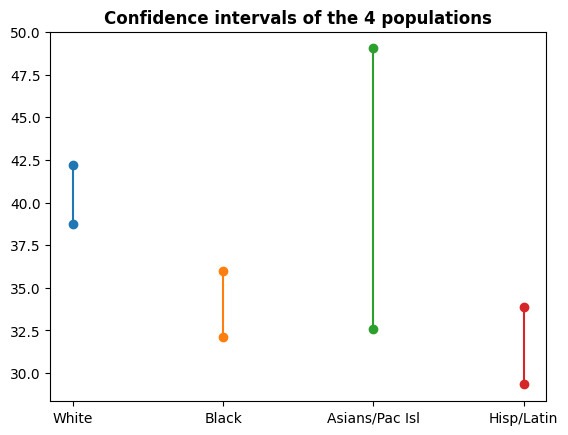

In [21]:
# this code was copied from Calvin's solutions to chapter 10 exercises - to be honest we didn't know how to plot the confidence interval
# using the data we calculate above, but we still wanted to see a visual representation. And that allowed us to easily calculate the
# confidence intervals for all 4 ethnicities (we ignored natives becase there are only 4 of them):)

df_ages = pd.DataFrame({
    'White': age_of_raceethnicity['White'],
    'Black':age_of_raceethnicity['Black'],
    'Asians/Pac Isl':age_of_raceethnicity['Asian/Pac Isl'],
    'Hisp/Latin':age_of_raceethnicity['Hisp/Latin']
})

for i in range(len(df_ages.columns)):
    y = df_ages.mean()[i]
    s = df_ages.std()[i]
    n = df_ages.count()[i]
    SEy = s/n**0.5

    confidence_interval = 0.95 
    P = 1-confidence_interval
    f = n - 1 
    t = stats.t.ppf(1-P/2, f)

    delta_mean = t*SEy
    print(f'The lower limit of the 95% confidence interval for {df_ages.columns[i]} is {y-delta_mean}')
    print(f'The upper limit of the 95% confidence interval for {df_ages.columns[i]} is {y+delta_mean} \n')
    
    plt.plot([df_ages.columns[i],df_ages.columns[i]],[y-delta_mean,y+delta_mean], '-o')
    plt.title('Confidence intervals of the 4 populations', fontweight = 'bold')

Now that we have been able to plot confidence intervals for four ethnicities, we can see that the difference between Population 1 (White) and Population 2 (Black) is statistically significant, as mentioned above. However, the other three confidence intervals overlap, so the difference between them is likely a coincidence.

## 2.6 When did the most killings occur?

### 2.6.1 Deaths by month

The next pie chart shows the ratio of deaths based on the months we had access to in the data set. Each pie shows the percentage of people killed based on the month they were killed in.

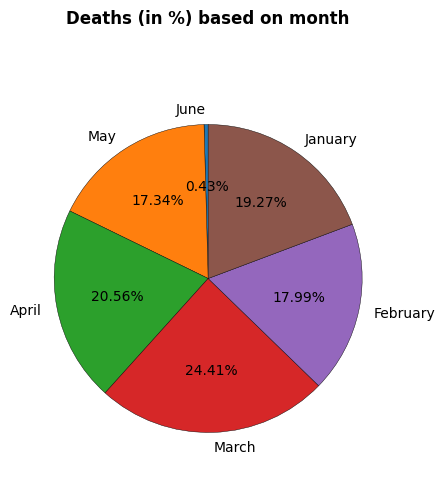

In [22]:
#Alex
df['month'].value_counts().sort_index(ascending = False).plot.pie(
    figsize = (5, 5),
    autopct= '%1.2f%%',
    wedgeprops={"edgecolor":"black",'linewidth': 0.3, 'antialiased': True},
    startangle = 90,
    labels = ['June', 'May', 'April', 'March', 'February', 'January']
)
plt.title('Deaths (in %) based on month', pad = 45, fontweight = 'bold')
plt.ylabel('')
plt.show();

We can see that most of the killing occurred in March. Since we do not have data from additional months, we cannot compare our data to that of summer and fall due to the fact that we are not sure if we are processing a subset of a larger data set or if this is the complete data set.

### 2.6.2 Deaths by day

The following graph demonstrates the number of deaths on days of the year.

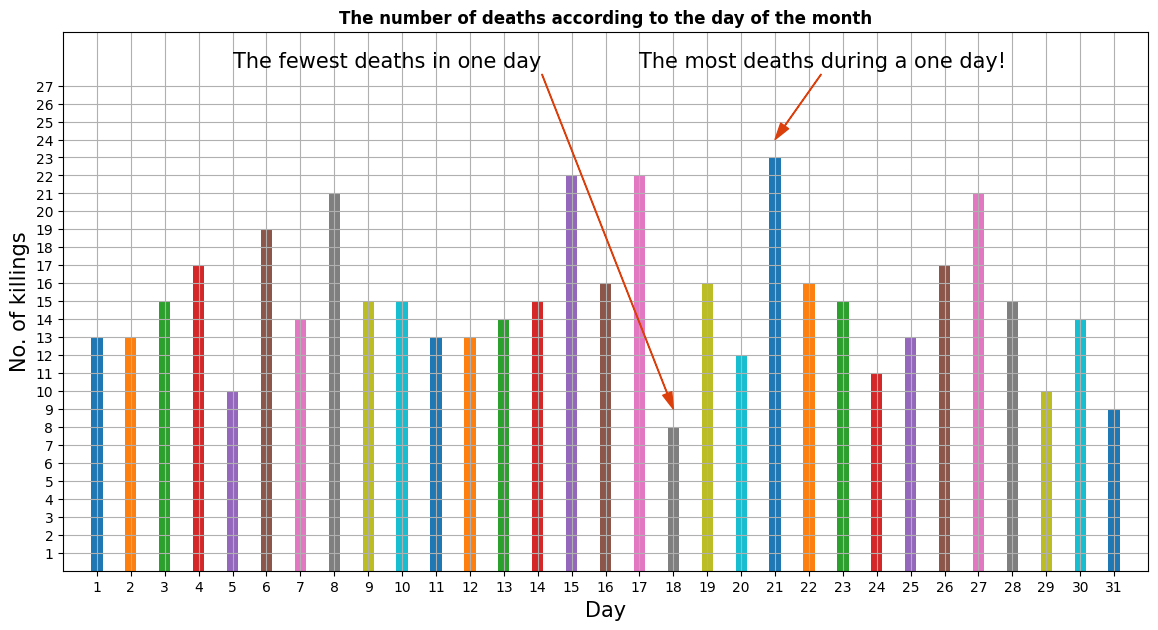

In [23]:
# Matej/Alex

# grouping data from df and creating a graph. Dividing into 2 parts: number of deaths (y-axis) and day of the month (x-axis)
df.groupby(by = 'day')['day'].plot.hist(

    figsize=(14,7), # changes the figure size (heaight and width)
    bins = 3,
    rwidth = 3,
    linewidth=0.5,
    xlim = (0, 32), # makes a range on x-axis
    ylim = (0, 30), # makes a range on y-axis
    xticks = np.arange(1, 32, 1),
    yticks = np.arange(1, 28, 1),
    grid = True, # makes a grid

)

# arrows pointing to the highest and lowest values
plt.annotate('The most deaths during a one day!', xy = (21, 24), xytext = (17, 28), fontsize = 15, arrowprops={'width':0.4,'headwidth':7,'color':'#db3f0b'})
plt.annotate('The fewest deaths in one day', xy = (18, 9), xytext = (5, 28), fontsize = 15, arrowprops={'width':0.4,'headwidth':7,'color':'#db3f0b'})

plt.title('The number of deaths according to the day of the month', fontweight = 'bold') # makes a title
plt.ylabel('No. of killings', fontsize = 15) # makes a name of y-axis
plt.xlabel('Day', fontsize = 15) # makes a name of x-axis
plt.show()

Looking at the graph above, it can be seen that the number of deaths in 2015 was not at all related to the day of the month. The statistics show that the most deaths occurred on the 23rd, which can be considered the most critical day of the month, and the fewest deaths occurred on the 18th, which can be considered the least tragic date of the months of the year.
Our results and conclusions could be different than expected if the variable values were entered incorrectly or if incorrect values were entered. This would bias the results and affect the overall conclusion on the hypothesis: "The number of deaths is related to the day of the month".

### 2.6.3 Can we prove that this data follows a binomial distribution?

Assuming the chance of being killed on any day is the same (1/31 = 3.26%), we want to prove that this data follows a binomial distribution.
First, we create a histogram of y-values of the previous graph:

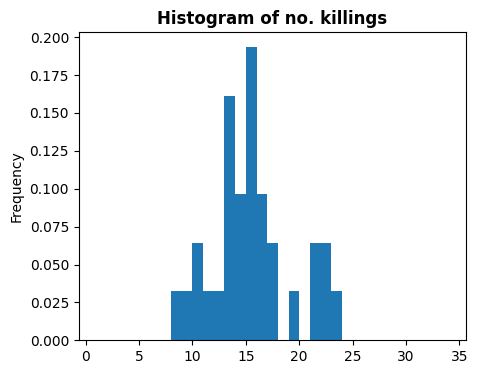

In [24]:
# Lucie
df.groupby('day')['day'].value_counts().reset_index(drop=True).plot.hist(
    figsize = (5,4),
    bins=np.arange(1, 35, 1),
    density = True
)
plt.title('Histogram of no. killings', fontweight = 'bold')
plt.show()

Then we simulate p = 1/31 (3.26%) for n = 467, repeat that one million times, store the outcomes in a data frame called "df_random" and plot the values on a histogram.

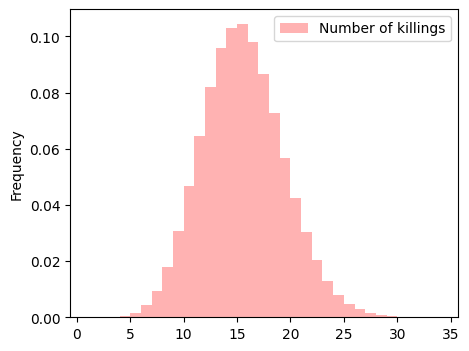

In [25]:
# Lucie
from numpy.random import binomial
from scipy.special import binom

p=1/31
n=467
df_random = pd.DataFrame({
    'Number of killings': binomial(n,p,size=1000000)
})

df_random.plot.hist(
    figsize = (5,4),
    bins=np.arange(1, 35, 1),
    density = True,
    alpha = 0.3,
    zorder=1,
    color = 'red',
);

Thus, we have proved that these data follow a binomial distribution. To better illustrate this, we can overlay these two graphs:

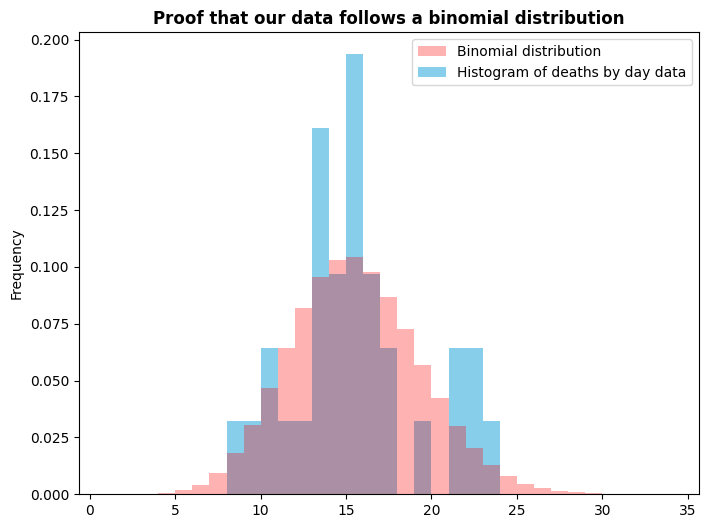

In [26]:
# Lucie
df_random.plot.hist(
    figsize = (8,6),
    bins=np.arange(1, 35, 1),
    density = True,
    alpha = 0.3,
    zorder=1,
    color = 'red',
)
df.groupby('day')['day'].value_counts().reset_index(drop=True).plot.hist(
    figsize = (8,6),
    bins=np.arange(1, 35, 1),
    density = True,
    zorder=0,
    color = 'skyblue',
)
plt.legend(['Binomial distribution', 'Histogram of deaths by day data'])
plt.title('Proof that our data follows a binomial distribution', fontweight = 'bold')
plt.show()

## 2.7 Map of the killings

Reminder: If you're viewing this in Jupyter notebook, the scatter plot on map won't work unless you have geopandas installed. View it in Deepnote instead.

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


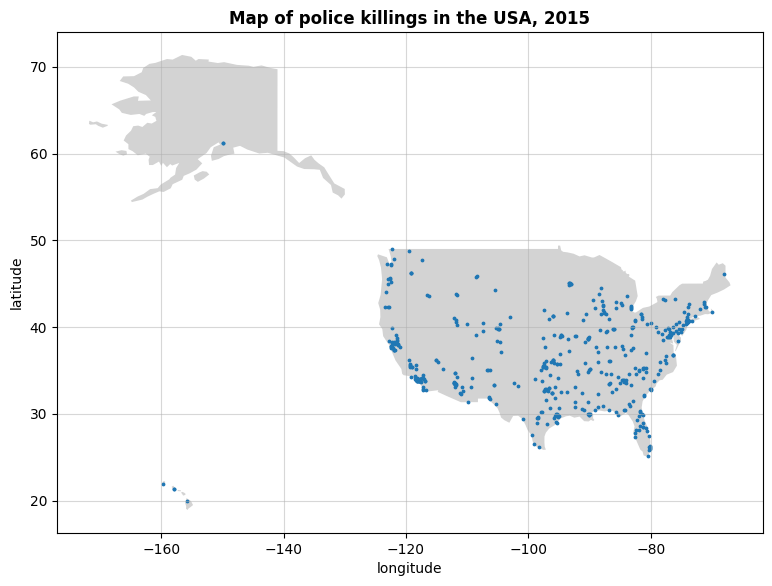

In [27]:
# Lucie
# creates a new data frame with only 'latitude' and 'longitude' columns
map_df = df[['latitude', 'longitude']].copy()
map_df.head()

# reads a folder with map information and saves it into a data frame called "countries"
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# initialize an axis
fig, ax = plt.subplots(figsize=(13,6.5))

# plots map
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax=ax)

# make a scatter plot using coordinates (long. & lat.)
df.plot.scatter(
    x="longitude", 
    y="latitude", 
    ax=ax, 
    s=3,
)

# adds grid
ax.grid(visible=True, alpha=0.5)

# adds title
plt.title('Map of police killings in the USA, 2015', fontweight = 'bold')

plt.show();

### 2.7.1 Regions in the US by police brutality

Looking at the map above, most of the killings happened in the western and southeastern region of United States. The pie chart below shows that the most police brutality took place in the southeastern region, followed by the western region.
Source for regions

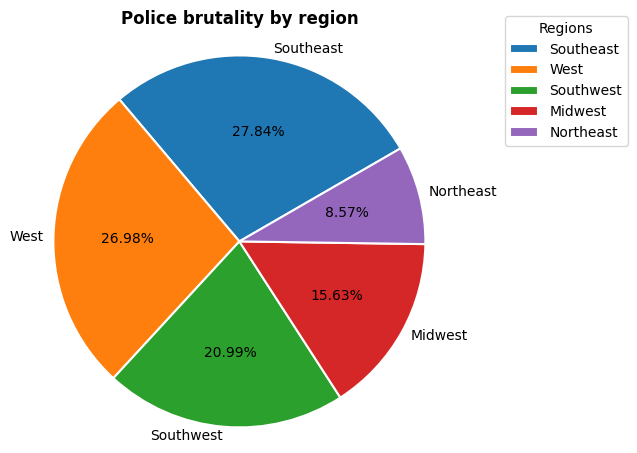

In [28]:
# Lucie
# creates a new column in "df" called "region", .replace() replaces the abbreviations of states based on
# which region they belong to (in the new column - "region")
df['region'] = df['state']\
.replace(['WA', 'OR', 'ID', 'MT', 'WY', 'CO', 'UT', 'NV', 'CA', 'HI', 'AK'],'west')\
.replace(['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'IL', 'IN', 'OH', 'MI', 'WI'], 'midwest')\
.replace(['AZ', 'NM', 'TX', 'OK'], 'southwest')\
.replace(['AR', 'LA', 'MS', 'AL', 'FL', 'GA', 'SC', 'NC', 'TN', 'KY', 'VA', 'DC', 'DE', 'MD', 'WV'], 'southeast')\
.replace(['PA', 'NJ', 'CT', 'RI', 'MA', 'NH', 'ME', 'VT', 'NY'], 'northeast')

df['region'].value_counts(normalize=True *100).plot.pie(
    figsize=(3,4),
    autopct='%1.2f%%',
    ylabel = '',
    startangle=30,
    radius = 2,
    wedgeprops={"edgecolor":"white",'linewidth': 1.5, 'antialiased': True},
    labels = ['Southeast', 'West', 'Southwest', 'Midwest', 'Northeast'],
    labeldistance = 1.05
);
plt.legend(loc="best", bbox_to_anchor=(2.2, 1.5), title="Regions");
plt.title("Police brutality by region", y = 1.4, fontweight="bold");
plt.show();

### 2.7.2 Interactive map of the killings

We also decided to create interactive map, so we can see off the data on map. If you mouse over the blue marker, you will see the name, race and age of the person.

In [29]:
# Vlad
# creating a basic map
map_killed = folium.Map(
    location=[37.0902,-95.7129], #giving the starting point to our map
     zoom_start=3.5, #start zoom
     control_scale=True
)

# adding cordinates data on map
df.apply(lambda row: folium.Marker(location=[row['latitude'], row['longitude']], #from where we will take cordinates
                                popup=f"""
                                Name: {row['name']}</br></br>
                                Age: {row['age']}</br></br>
                                Gender: {row['gender']}</br></br>
                                Race/Ethnicity: {row['raceethnicity']}</br></br> 
                                Cause: {row['cause']}</br></br> 
                                Armed: {row['armed']}
                                """,
                                tooltip='click').add_to(map_killed), axis=1)
                                #description when u ckick on it

# add full screen button to map
plugins.Fullscreen(position='topright').add_to(map_killed)

map_killed

## 2.8 Blue vs. red states

We want to see if there is a difference in police killings between blue (democrat) states and red (republican) states.

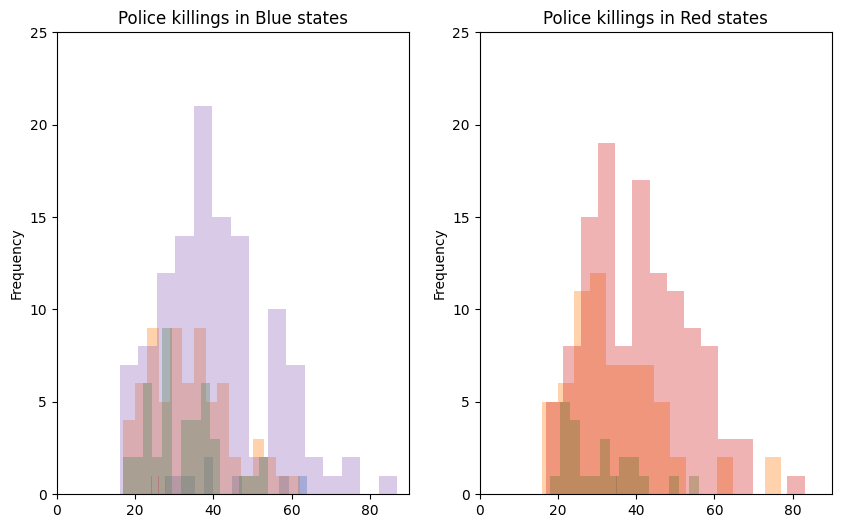

In [30]:
# Roland
# dividing states in to Democratic and Republican

blue_list = ['WA', 'OR', 'NV', 'CA', 'AZ', 'NM', 'CO', 'MN', 'WI', 'IL', 'MI', 'GA', 'ME', 'NH', 'NY', 'PA', 'VA', 'DC', 'MD', 'DE', 'NJ', 'CT', 'MA', 'HI']
red_list = ['ID', 'MT', 'UT', 'WY', 'ND', 'SD', 'NE', 'IA', 'KS', 'MO', 'OK', 'AR', 'TX', 'LA', 'MS', 'AL', 'FL', 'TN', 'KY', 'IN', 'OH', 'WV', 'NC', 'SC']
df_blue = df[df.state.isin(blue_list)]
df_red = df[df.state.isin(red_list)]

grouped_blue = df_blue.groupby('raceethnicity')
grouped_red = df_red.groupby('raceethnicity')

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
plt.setp(axes, xlim=(0,90), ylim=(0,25))

grouped_blue['age'].plot.hist(
    bins=15,
    ax=axes[0],
    alpha = 0.35,  # Tranparency
    title = 'Police killings in Blue states'
);
grouped_red['age'].plot.hist(
    bins=15,
    ax=axes[1],
    alpha = 0.35,  # Tranparency
    title = 'Police killings in Red states'
);

In [31]:
print('\033[1m  Table showing races/ethnicities of people from BLUE states \033[0m')
print(df_blue['raceethnicity'].value_counts())
print('\033[1m  Table showing races/ethnicities of people from RED states \033[0m')
print(df_red['raceethnicity'].value_counts())

  Table showing races/ethnicities of people from BLUE states 
White                     117
Black                      69
Hispanic/Latino            42
Asian/Pacific Islander      8
Native American             3
Name: raceethnicity, dtype: int64
  Table showing races/ethnicities of people from RED states 
White                     119
Black                      66
Hispanic/Latino            24
Asian/Pacific Islander      2
Name: raceethnicity, dtype: int64


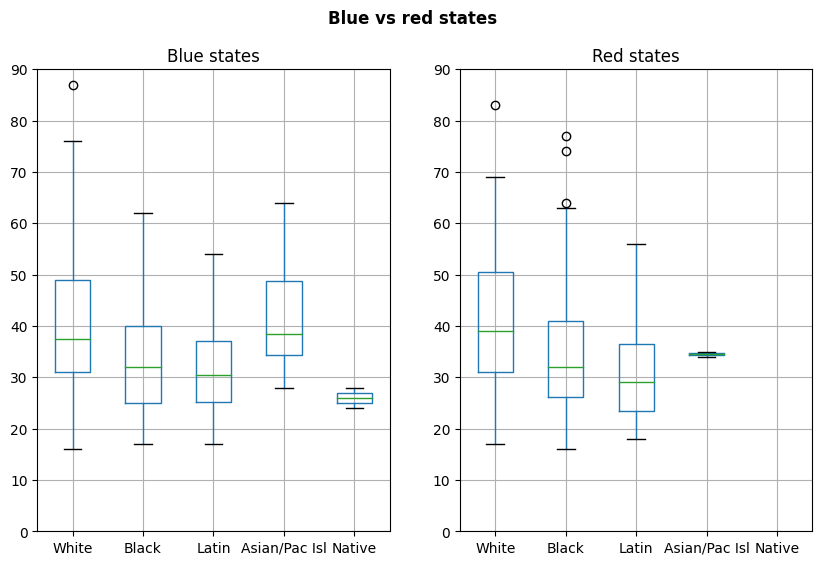

In [32]:
# Vlad, Roland, and Lucie 
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
plt.setp(axes, ylim=(0,90))

white_age_blue = df_blue[df_blue['raceethnicity']=='White']['age'].reset_index(drop=True)
black_age_blue = df_blue[df_blue['raceethnicity']=='Black']['age'].reset_index(drop=True)
hisp_latin_age_blue = df_blue[df_blue['raceethnicity']=='Hispanic/Latino']['age'].reset_index(drop=True)
asian_islander_age_blue = df_blue[df_blue['raceethnicity']=='Asian/Pacific Islander']['age'].reset_index(drop=True)
native_age_blue = df_blue[df_blue['raceethnicity']=='Native American']['age'].reset_index(drop=True)

# making new DataFrame
age_of_raceethnicity_in_blue = pd.concat({
    'White': white_age_blue,
    'Black': black_age_blue,
    'Latin': hisp_latin_age_blue,
    'Asian/Pac Isl': asian_islander_age_blue,
    'Native': native_age_blue
}, axis='columns')

#plotting our DataFrame with boxplot
age_of_raceethnicity_in_blue.boxplot(
    figsize=(6,6),
    grid=True,
    ax=axes[0],
    widths=0.5,
    sym = 'o',
    vert=True,
)

white_age_red = df_red[df_red['raceethnicity']=='White']['age'].reset_index(drop=True)
black_age_red = df_red[df_red['raceethnicity']=='Black']['age'].reset_index(drop=True)
hisp_latin_age_red = df_red[df_red['raceethnicity']=='Hispanic/Latino']['age'].reset_index(drop=True)
asian_islander_age_red = df_red[df_red['raceethnicity']=='Asian/Pacific Islander']['age'].reset_index(drop=True)
native_age_red = df_red[df_red['raceethnicity']=='Native American']['age'].reset_index(drop=True)

# making new DataFrame
age_of_raceethnicity_in_red = pd.concat({
    'White': white_age_red,
    'Black': black_age_red,
    'Latin': hisp_latin_age_red,
    'Asian/Pac Isl': asian_islander_age_red,
    'Native': native_age_red
}, axis='columns')
#plotting our DataFrame with boxplot
age_of_raceethnicity_in_red.boxplot(
    figsize=(6,6),
    grid=True,
    ax=axes[1],
    widths=0.5,
    sym = 'o',
    vert=True,
)
axes[0].set_title('Blue states')
axes[1].set_title('Red states')
fig.suptitle("Blue vs red states", fontweight = 'bold');

Based on everything we hear about the U.S., we would expect more POC to be killed by police in red states, but this data does not show that. In fact, it shows that more minorities are killed by police in blue states than in red states. When we loook at the data in this way, we might get the wrong answers. 
We would probably need more data on the population, more specifically on the proportion of minorities in those states. Blue states tend to be more densely populated, so we would also need to look at the difference in population size between blue and red states. 
More on the problems caused by lack of and disparity in data in section 3.

# 3 Discussions and conclusion

## 3.1 Flaws of the data set

### 3.1.1 Missing data

While working with the dataset, I noticed that some data were missing (e.g., race, names, age), which may have led to inaccuracies in the results. 

### 3.1.2 Origin of the data

It has already been mentioned that we cannot be sure about the true origin of this data set, its credibility and whether this is an edited version of the original data set. Perhaps the original poster of this data set cherry-picked certain data to influence the outcome of the analysis. 
We also cannot confirm that the data was collected randomly and independently. This means that the sample is most likely biased.

### 3.1.3 Sample size

One of my concerns was about the sample size. It seems to me that there is far too little data given the actual population of the U.S. (330 million), and as stated earlier, this dataset does not accurately reflect the ethnic distribution in the U.S.

### 3.1.4 is this data set a selection from a larger one?

We cannot be sure if this is all the deaths caused by police in 2015, or if it's just a selection of a few. Knowing that, we would certainly look at the results we get differently. 

### 3.1.5 Flaws of the data set - conclusion

Given all of the above, we cannot make assumptions that describe the U.S. population as a whole.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=affd6b4f-adf5-4a69-b9ec-db138850be95' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>